<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/SVM_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


In [3]:
# Data Normalization
print(np.max(faces.data))
print(np.min(faces.data))

print(np.mean(faces.data))

1.0
0.0
0.5470426


In [4]:
# Drawing sample images
def print_faces(images, target, top_n):
  # set up the figure size in inches
  fig = plt.figure(figsize=(15,15))
  #fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  for i in range(top_n):
    # plot the images in a matrix of size 20x20
    p = fig.add_subplot(10,10, i+1)
    p.imshow(images[i])

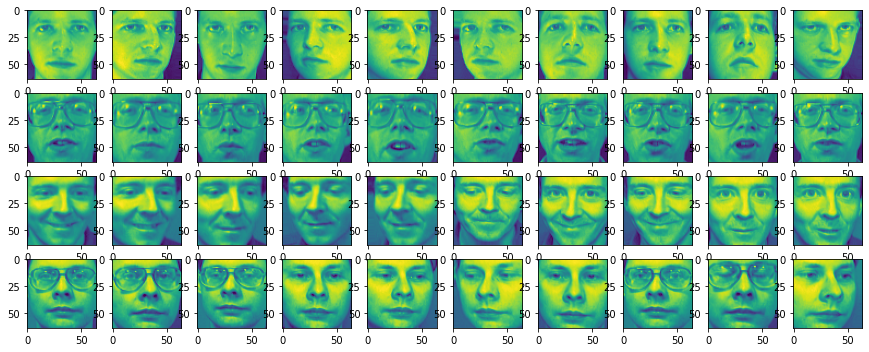

In [5]:
print_faces(faces.images, faces.target, 40)

In [6]:
# Training a support vector machine classification model
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
svc_2 = SVC(kernel='rbf')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.model_selection import  cross_val_score, KFold
from scipy.stats import sem

def evaluat_cross_validation (clf, X, y, K):
  # create a k-fold cross validation iterator
  cv = KFold(n_splits=5, random_state=None, shuffle=False)
  scores = cross_val_score(clf, X, y, cv=cv)
  print(scores)
  print("Mean Scores: ", np.mean(scores))

In [9]:
evaluat_cross_validation (svc_1, X_train, y_train, 5)

[0.9        1.         0.91666667 0.9        0.88333333]
Mean Scores 0.9199999999999999


Accuracy on training set:  1.0
Accuracy on testing set:  0.99


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


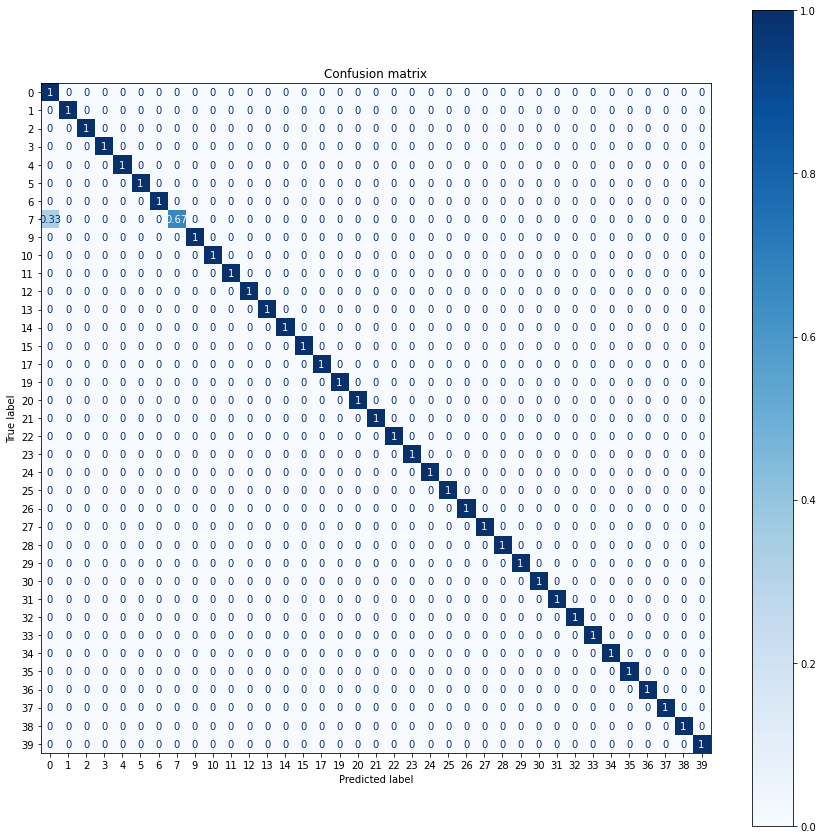

In [53]:
# Developing a SVM model (single)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  print("Accuracy on training set: ", clf.score(X_train, y_train))
  print("Accuracy on testing set: ", clf.score(X_test, y_test))
  y_pred = clf.predict(X_test)
  fig, ax  = plt.subplots(figsize=(15, 15))
  plot_confusion_matrix(clf, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
  plt.title('Confusion matrix') 
  plt.show() 
 
  
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:  0.99
Accuracy on testing set:  0.86


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


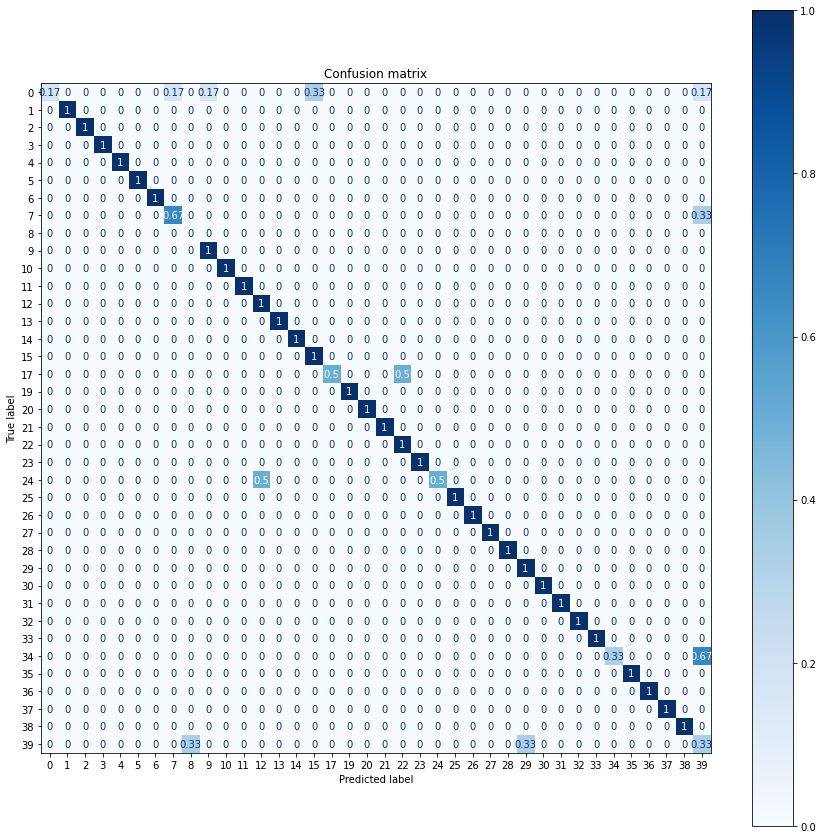

In [54]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)